# Intermediate Python for Engineers Day 4

Welcome!

# Setup

Here are some setup instructions:

## Browser

Please use Chrome or Firefox or Safari. *Preferably not IE or Edge*.

## Jupyter notebook server

1. Go to [https://hub.pythoncharmers.com/](https://hub.pythoncharmers.com/)
2. Your username is your email address
3. The password is the same as you used to log in to Zulip and is in the setup email.

## Load up your notebook

- It will be called "Yourname Day 1.ipynb".
- Save it (Control-S or File | Save Notebook).

We'll give more instructions on getting started with the notebooks as we start the course.

## Zulip chat server

1. Go to [https://pythoncharmers.zulipchat.com](https://pythoncharmers.zulipchat.com)
2. **Test:** Please send a message to our stream (#**485 Python for Engineers** ) saying Hi!

## Resources

- Please download the course materials PDF (in your home folder)
- You may also download the `.zip` file containing the Jupyter Notebooks of the course materials

## Trainer notebook

We suggest that you load up the trainer's notebook from the Trainer folder in a separate browser tab and reload when needed.

(To do this, right-click the file, then choose "Open in New Browser Tab". Then hit F5 or Command-R whenever you want to see the latest version of the trainer's notebook.)

## Session 4: Testing

Session 4 teaches you how to create automated tests for *Python* code:

- Creating scripts with command-line arguments (homework revision)
- Why testing? Overview of test-driven development (TDD)
- Introduction to *pytest*
- Fixtures
- Coverage reports
- Testing best practices
- Introduction to mocking
- (Time permitting): Introduction to property-based testing


In [13]:
%%writefile newster_parent/tests/test_failure.py
import pytest
import newspaper

from newster import newster

@pytest.mark.parametrize(
    'url',
    [
        'bad_url',
        'https://pythoncharmers.com/doesnotexist.html',
        'https://pythoncharmers.com', 
    ]
)
def test_bad_url(url):
    with pytest.raises(newspaper.ArticleException):
        newster.process_url(url)

Overwriting newster_parent/tests/test_failure.py


In [18]:
%%!
cd newster_parent/
pytest --cov=newster

['============================= test session starts ==============================',
 'platform linux -- Python 3.8.4, pytest-6.0.1, py-1.9.0, pluggy-0.13.1',
 'rootdir: /home/jovyan/newster_parent',
 'plugins: mock-3.3.1, Faker-4.1.2, dash-1.15.0, hypothesis-5.29.0, cov-2.10.1',
 'collected 14 items',
 '',
 'tests/test_failure.py ..F                                                [ 21%]',
 'tests/test_newster.py ..FF......                                         [ 92%]',
 'tests/test_sample.py .                                                   [100%]',
 '',
 '=================================== FAILURES ===================================',
 '___________________ test_bad_url[https://pythoncharmers.com] ___________________',
 '',
 "url = 'https://pythoncharmers.com'",
 '',
 '    @pytest.mark.parametrize(',
 "        'url',",
 '        [',
 "            'bad_url',",
 "            'https://pythoncharmers.com/doesnotexist.html',",
 "            'https://pythoncharmers.com',",
 '        ]

In [15]:
FAILED tests/test_newster.py::test_generate_report[True] - TypeError: generate_report() got an unexpected keyword argument 'csv'

SyntaxError: invalid syntax (<ipython-input-15-cd9732d6eb55>, line 1)

In [17]:
!pip install pytest-mock

  Using cached pytest_mock-3.3.1-py3-none-any.whl (11 kB)


In [19]:
import dask.array as da
import numpy as np


In [20]:
da.array([1, 2, 3])


dask.array<array, shape=(3,), dtype=int64, chunksize=(3,), chunktype=numpy.ndarray>

In [21]:
def estimate_pi_numpy(n=10**6):
    x, y = np.random.uniform(low=0, high=1, size=(2, n))
    in_circle = np.hypot(x, y) < 1
    return 4 * np.mean(in_circle)

In [86]:
estimate_pi_numpy(n=10**7)

3.1413468

In [93]:
def estimate_pi_dask(n=10**6):
    x, y = da.random.uniform(low=0, high=1, size=(2, n), chunks= n // 4)
    in_circle = da.hypot(x, y) < 1
    return 4 * da.mean(in_circle)

In [94]:
pi = estimate_pi_dask()

In [95]:
pi

dask.array<mul, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [96]:
%timeit estimate_pi_numpy()

64.1 ms ± 4.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [98]:
%timeit pi.compute(scheduler='threads')

24.7 ms ± 988 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [60]:
%timeit pi.compute(scheduler='processes')

350 ms ± 35.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
pi.compute()


3.142676

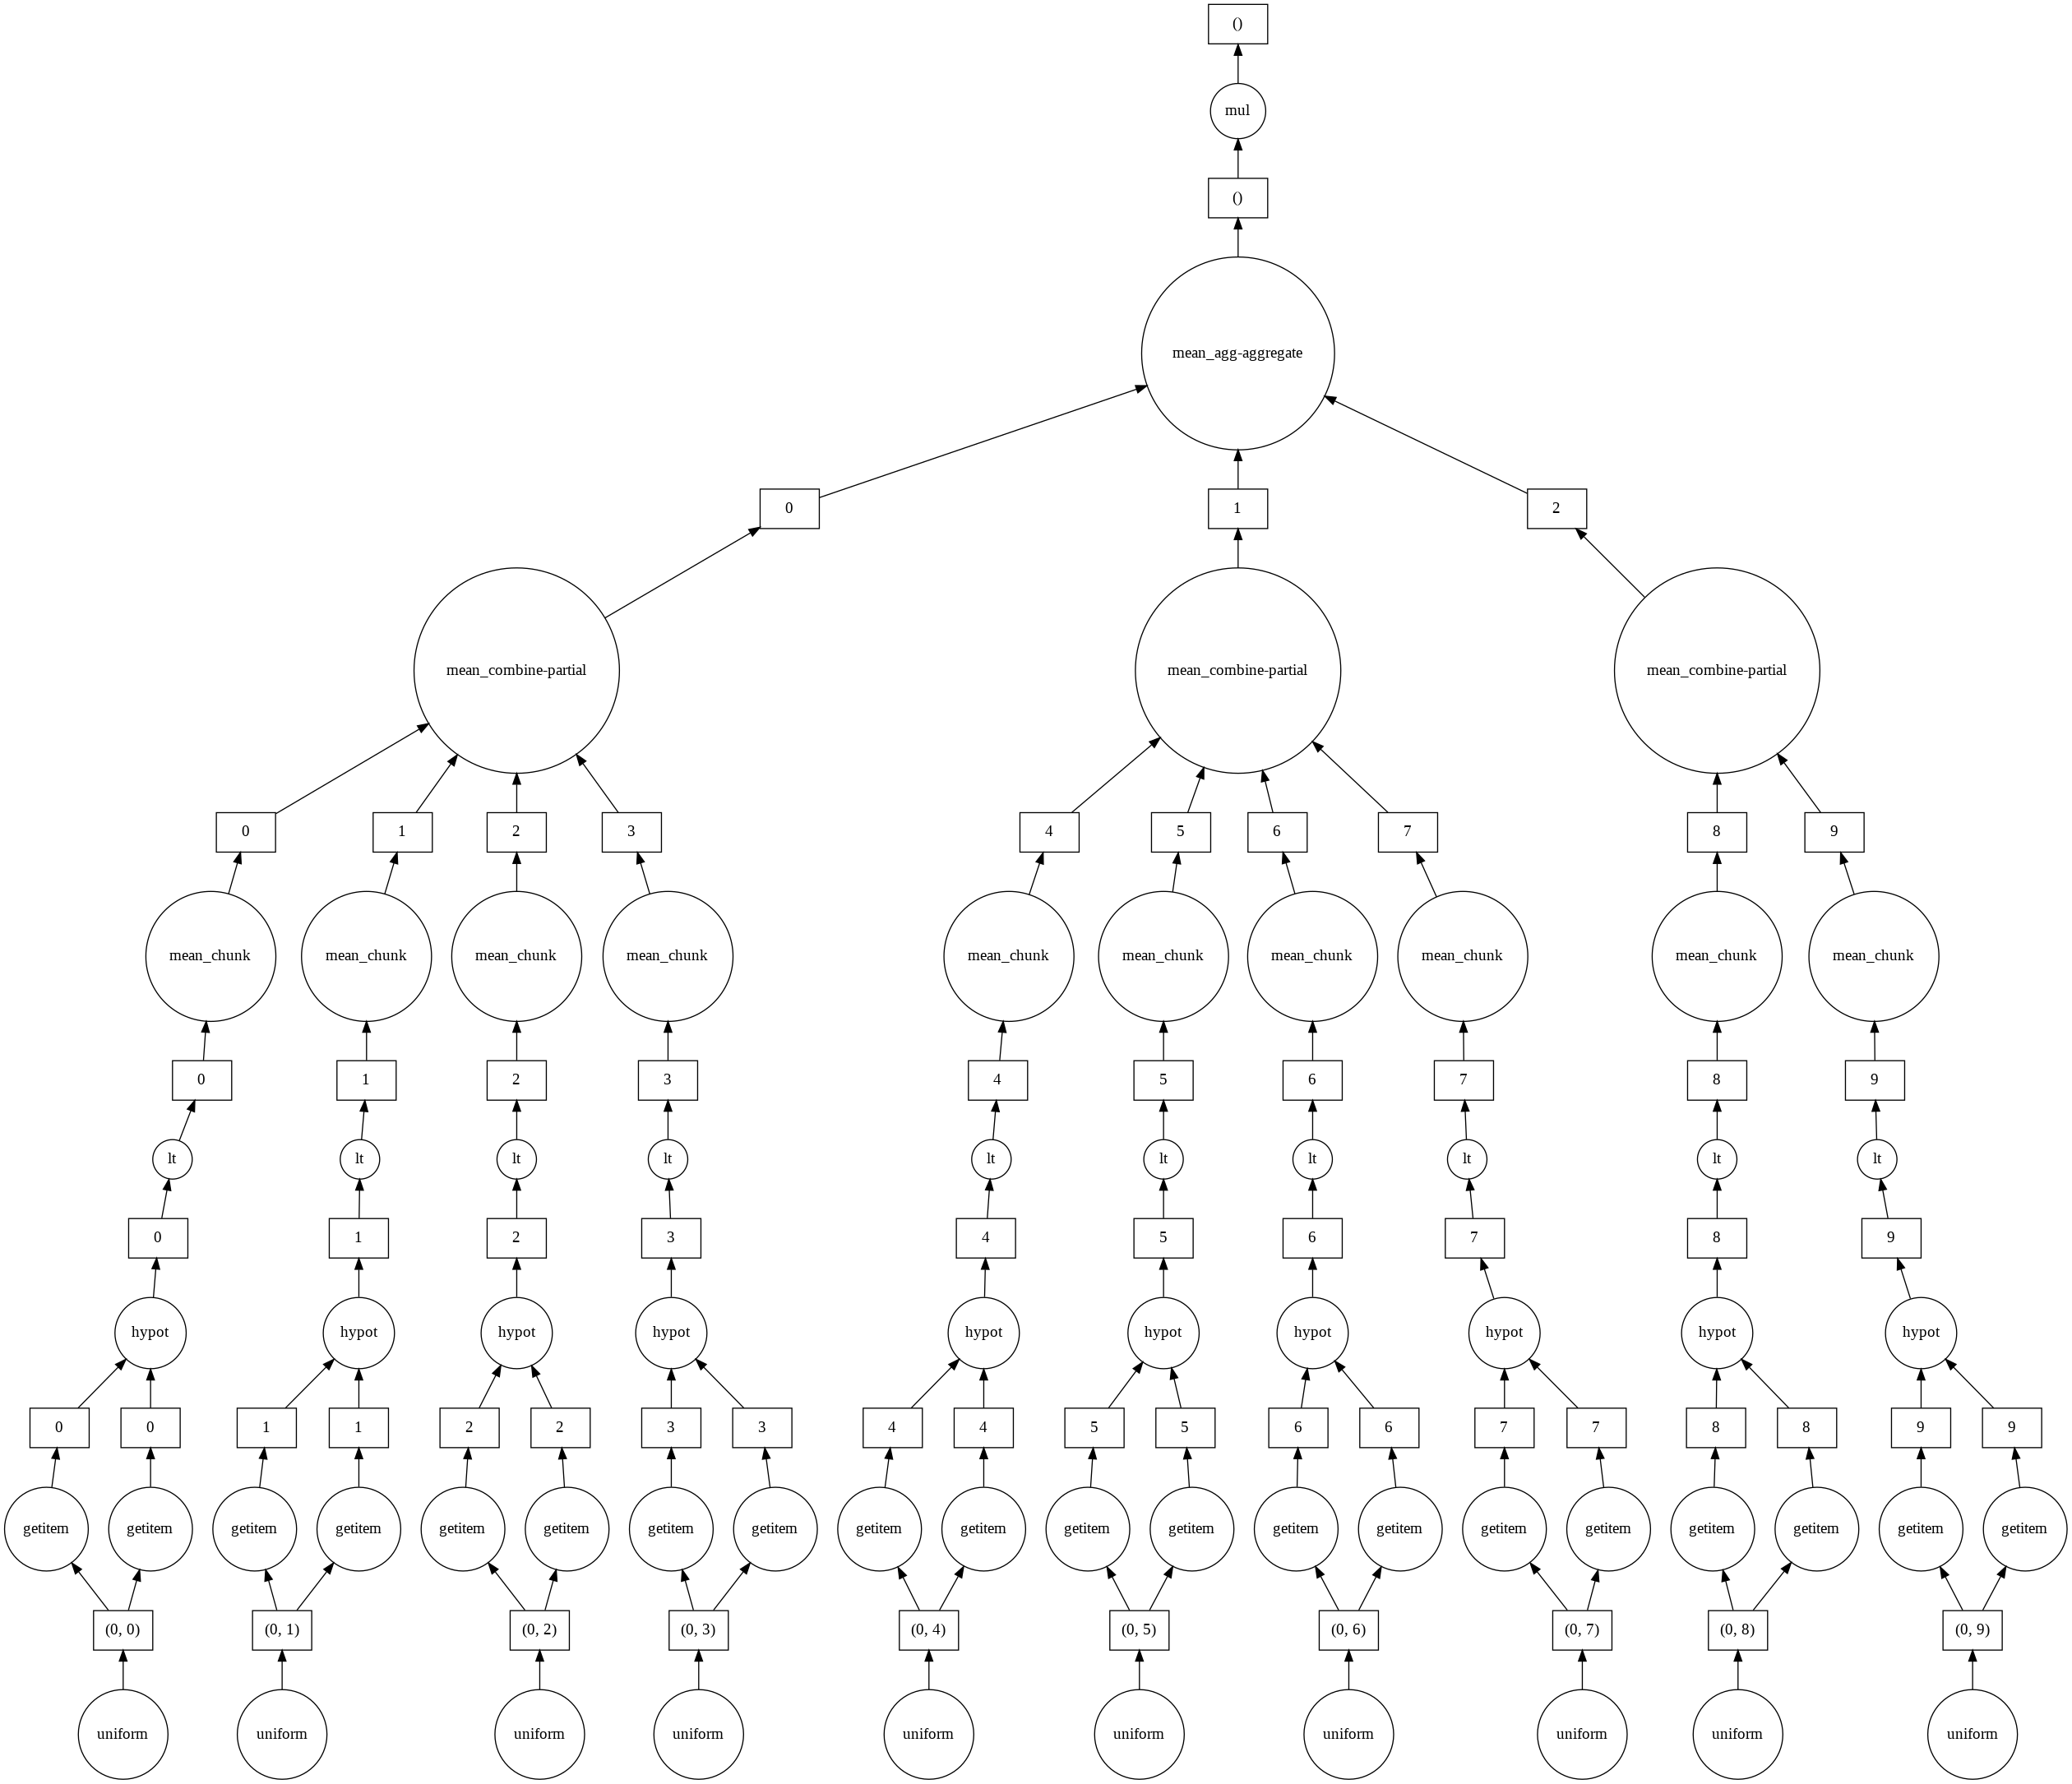

In [32]:
pi.visualize()